Tutorial 9 Decision Tree

>1.Load dataset users.csv

>2.Assign predictors and targets.

>3.Apply encoding using get_dummies().

>4.Split the dataset into train and test data.

>5.Building the model using a decision tree.

>6.Draw decision tree.

>7.Evaluate model performance on train and test sets

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
user = pd.read_csv('users.csv')

In [3]:
user

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,12,19000,0
1,15810944,Male,11,20000,0
2,15668575,Female,1,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,10,76000,0
...,...,...,...,...,...
94,15786993,Female,45,83000,0
95,15709441,Female,35,44000,0
96,15710257,Female,4,25000,0
97,15582492,Male,5,123000,1


In [4]:
user.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99 entries, 0 to 98
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          99 non-null     int64 
 1   Gender           99 non-null     object
 2   Age              99 non-null     int64 
 3   EstimatedSalary  99 non-null     int64 
 4   Purchased        99 non-null     int64 
dtypes: int64(4), object(1)
memory usage: 4.0+ KB


In [5]:
user.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,12,19000,0
1,15810944,Male,11,20000,0
2,15668575,Female,1,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,10,76000,0


In [6]:
x =  user.columns.drop('Purchased')
y = user["Purchased"]

In [7]:
user_encoded = pd.get_dummies(user[x]).astype(int)

In [8]:
user_encoded


,User ID,Age,EstimatedSalary,Gender_Female,Gender_Male
0,15624510,12,19000,0,1
1,15810944,11,20000,0,1
2,15668575,1,43000,1,0
3,15603246,27,57000,1,0
4,15804002,10,76000,0,1
...,...,...,...,...,...
94,15786993,45,83000,1,0
95,15709441,35,44000,1,0
96,15710257,4,25000,1,0
97,15582492,5,123000,0,1


In [9]:
from sklearn.model_selection import train_test_split

In [10]:
x_train, x_test, y_train, y_test = train_test_split(
    user_encoded, y, test_size=0.15, random_state=0
)

In [11]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(criterion='entropy',
                               random_state=1)
model.fit(x_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=1)

In [12]:
tarin_predictions = model.predict(x_train)
test_predictions = model.predict(x_test)

In [13]:
from sklearn.tree import plot_tree

#Plot the decision tree
      

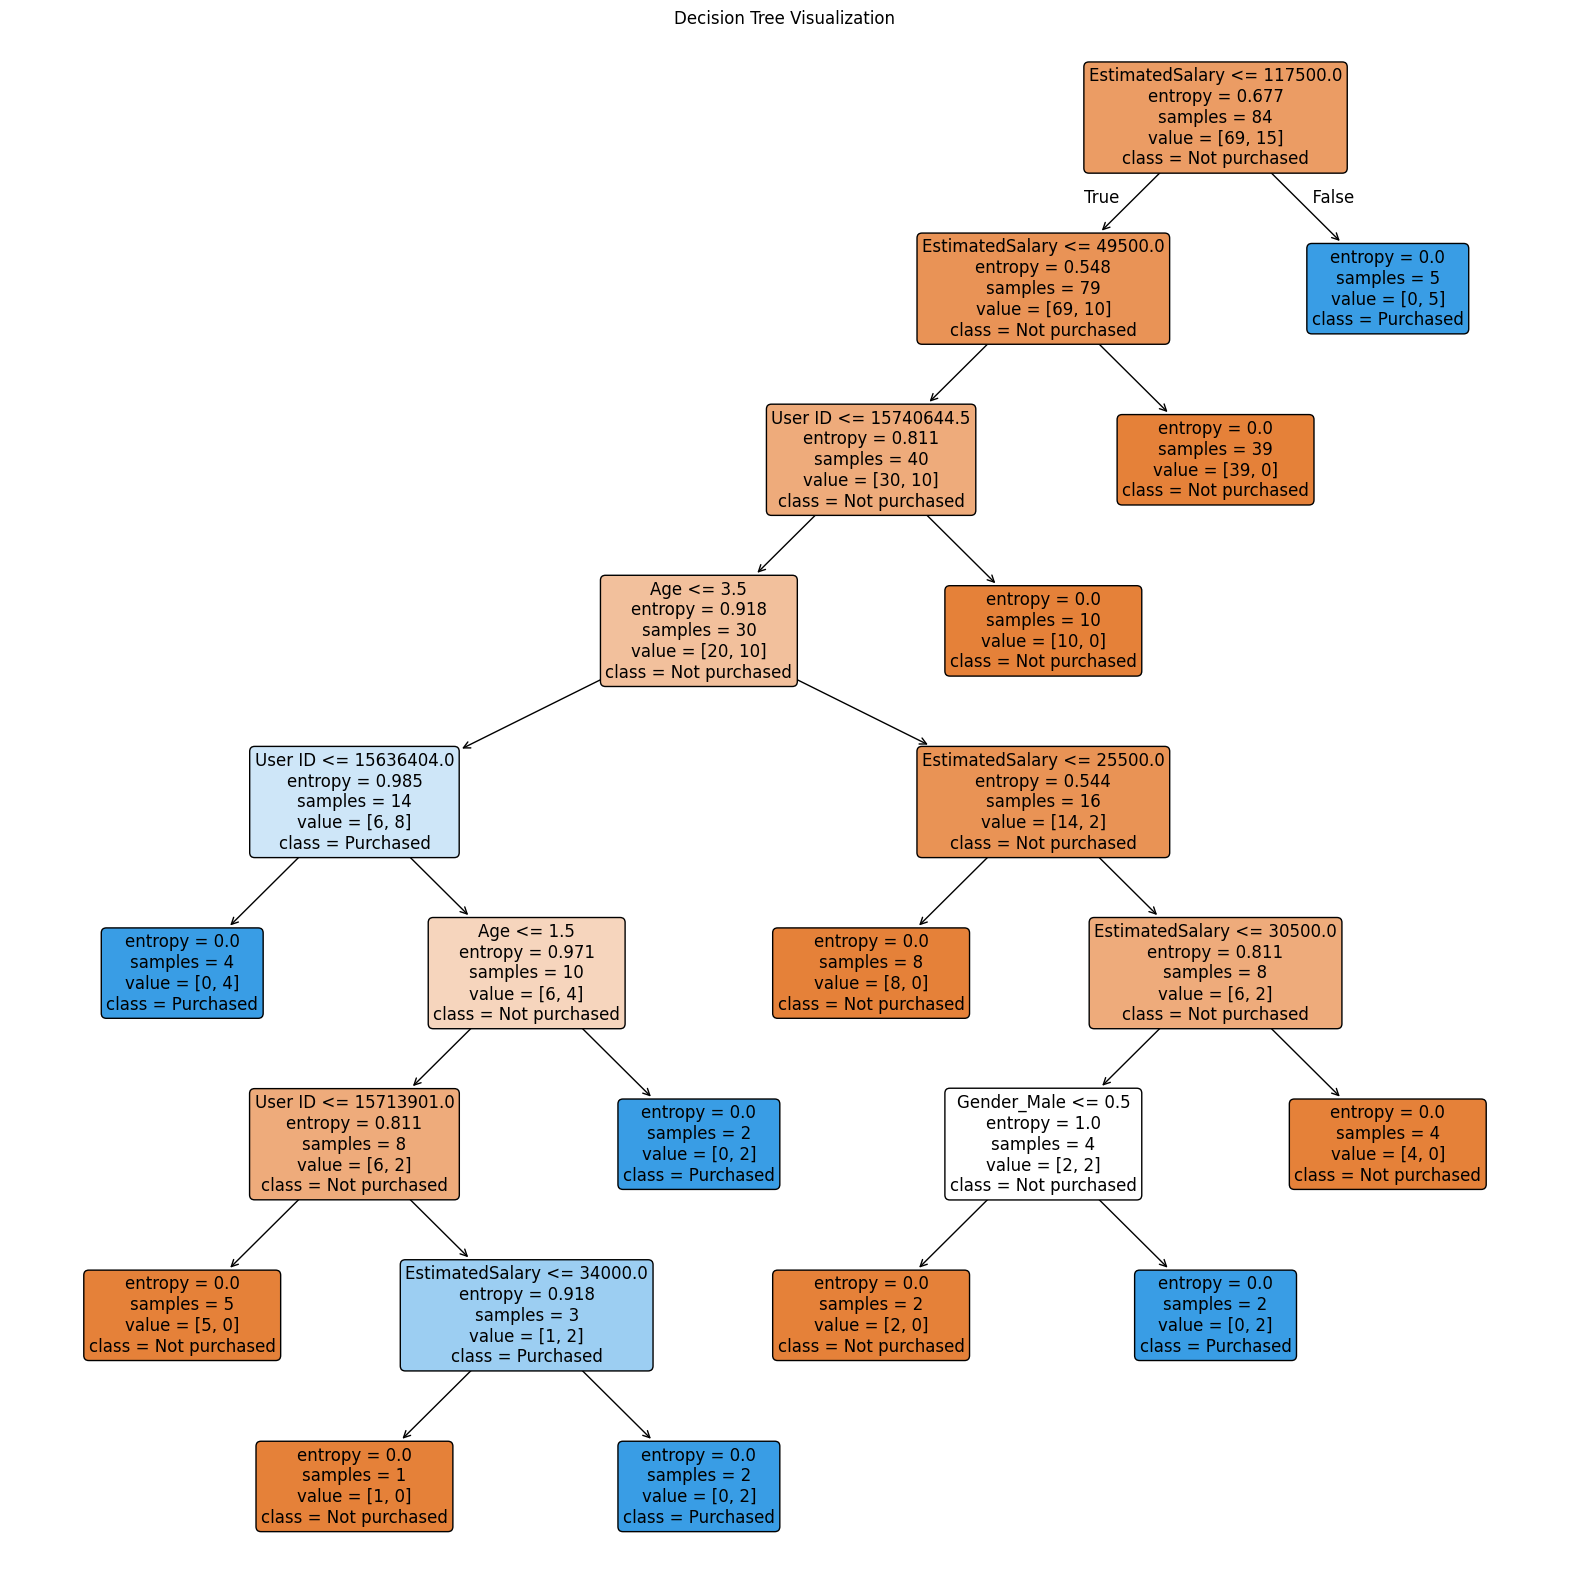

In [14]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

plt.figure(figsize=(20, 20))
plot_tree(model, 
          feature_names=user_encoded.columns, 
          filled=True, rounded=True,
          fontsize=12,
          class_names=['Not purchased', 'Purchased']
)
plt.title("Decision Tree Visualization")  # Fixed typo
plt.show()
